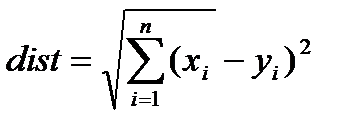


In [81]:
import numpy as np
import pandas as pd
from sklearn import model_selection, datasets, metrics, tree, ensemble
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [19]:
digits = datasets.load_digits()
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [33]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(digits.data, digits.target, test_size=0.25)

In [78]:
p = 0.75

idx = int(p * digits.data.shape[0]) + 1

X_train, X_test = np.split(digits.data, [idx])
y_train, y_test = np.split(digits.target, [idx])

In [71]:
import operator
def oneNN(point, point_array, tg):
    dist = {}
    for idx, point2 in enumerate(point_array):
        s = 0
        for x1, x2 in zip(point, point2):
            s += (x1-x2)*(x1-x2)
        dist.update({idx:s})
    sorted_tuples = sorted(dist.items(), key=operator.itemgetter(1))
    num = sorted_tuples[0][0]  # [(1, 1), (3, 4), (2, 9)]
    distance = sorted_tuples[0][1]
    return distance, tg[num]


In [27]:
digits.target[1:]
digits.data[1:]
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [48]:
dist, predict_tg = oneNN(digits.data[0], digits.target[1:], digits.data[1:])
print(dist, predict_tg)
print(digits.target[0])

120.0 0
0


In [66]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_test

array([[ 0.,  1.,  8., ...,  0.,  0.,  0.],
       [ 0.,  3., 15., ..., 16., 16.,  2.],
       [ 0.,  0.,  0., ...,  5.,  0.,  0.],
       ...,
       [ 0.,  0.,  5., ..., 15.,  3.,  0.],
       [ 0.,  0.,  1., ..., 12.,  1.,  0.],
       [ 0.,  0.,  2., ..., 15.,  3.,  0.]])

In [79]:
pred = []
for x in X_test:
    dist, predict_tg = oneNN(x, X_train, y_train)
    pred.append(predict_tg)
    

In [80]:
onenn_err_rate = 1 - accuracy_score(y_test, pred)
print(onenn_err_rate)

0.03786191536748329


In [ ]:
'''for idx, x in enumerate(X_train):
    tmp_X = X_train
    tmp_y = y_train
    print(tmp_X)
    print(X_train)
    
    tmp_X = np.delete(tmp_X, idx, 0)
    tmp_y = np.delete(tmp_y, idx, 0)
    tmp_X = pd.DataFrame(tmp_X)
    print(tmp_X)
    
    dist, predict_tg = oneNN(x, tmp_X, tmp_y)
    print(dist, predict_tg)'''

In [82]:
clf = RandomForestClassifier(n_estimators=1000).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9376391982182628

In [83]:
1-clf.score(X_test, y_test)

0.062360801781737196